In [1]:
!pip install git+https://github.com/koldbrandt/whisperx.git --upgrade

  Cloning https://github.com/koldbrandt/whisperx.git to /tmp/pip-req-build-bmhq_lgq
  Running command git clone -q https://github.com/koldbrandt/whisperx.git /tmp/pip-req-build-bmhq_lgq


  Created wheel for whisperx: filename=whisperx-1.0-py3-none-any.whl size=1191450 sha256=66bc28c83c29185f3254236c7c583581768cb65525002198b4257b9af4ea5819
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dpoqiuk/wheels/55/ed/3e/02cdbdb4f5af6aa856d189ea540dcd3576b09647fdb6e95048
Successfully built whisperx
You should consider upgrading via the '/zhome/ad/4/137151/whsiperx/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import whisperx
from pyannote.audio import Pipeline
from pyannote.audio import Inference
import torch
import numpy as np

In [3]:
device = "cuda" 
audio_file = "audio.mp3"

# transcribe with original whisper
model = whisperx.load_model("large", device)

In [4]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (cache).
Your token has been saved to /zhome/ad/4/137151/.cache/huggingface/token
Login successful


In [11]:
temperature = 0
temperature_increment_on_fallback = 0.2
temperature = tuple(np.arange(temperature, 1.0 + 1e-6, temperature_increment_on_fallback))

In [12]:
vad_pipeline = Inference(
    "pyannote/segmentation",
    pre_aggregation_hook=lambda segmentation: segmentation,
    use_auth_token=True,
    device=torch.device(device),
)

In [13]:
sample_rate = 16000

In [14]:
audio = whisperx.load_audio(audio_file)

In [15]:
audio = torch.tensor(audio)

In [16]:
hej = torch.stack((audio,audio))

In [17]:
hej.shape

torch.Size([2, 24928943])

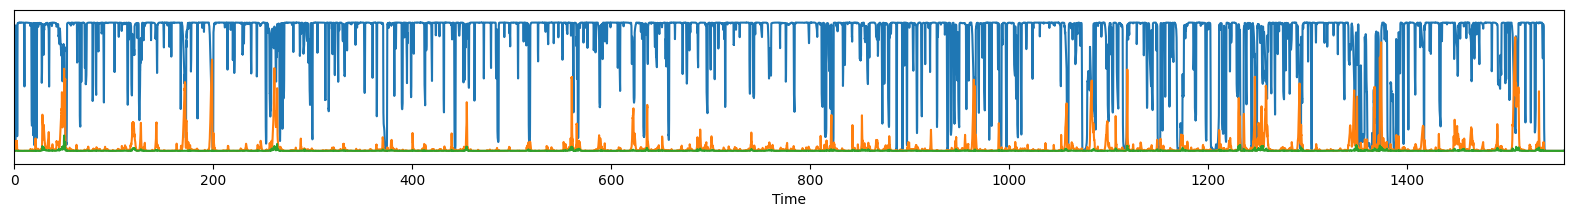

In [19]:
vad_pipeline({"waveform": hej, "sample_rate": sample_rate})

In [20]:
result = whisperx.transcribe_with_vad_parallel(model, audio, vad_pipeline, batch_size=8, **{"language" : "da", "task" : "transcribe"})

In [24]:
for i in result:
    print(i)
    break

segments


In [33]:
''.join([x['text'] for x in result['segments']])

" Hej med jer, Nørre Dortheket her. En lidt anderledes video, fordi jeg fik en lille opgave, som jeg har løst, og det vil jeg lige snakke om. af bordet, men øh... Åh, du er så lækker! Ja, du er så lækker! Ja, du er så lækker! Nå, en lille sidespring... Jeg kan ikke nævne at vippe den ned, den er så hyggelig. Men, øh... Det betyder, at når det er sådan, at jeg skal vise, hvad der er på bordet, så må vi lige møffe lidt en gang imellem. Sådan er det. Så... Hosa! Ja, blev du for skrækket, hva'? Jeg blev kontaktet på e-mail omkring en video jeg har lavet for en del år siden, i 16 eller 17 år. Dengang lavede jeg en video om sådan en detonator til tænding af fjørværkeri. Jeg linker til videoen her et eller andet sted, hvis der er nogen der ikke skulle have set den og har lyst til at se den. Den er meget sjov, og det virkede fint. Årene efter er jeg sådan jævnlig. Altså ikke jævnlig og jævnligt, men altså... Jeg får en gang imellem henvendelser fra folk, der spørger, Og jeg afviser egentlig de